In [1]:
pip install pandas numpy scikit-learn tensorflow matplotlib seaborn


  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 2.4 MB/s eta 0:02:37
   ---------------------------------------- 1.6/376.0 MB 2.7 MB/s eta 0:02:19
   ---------------------------------------- 2.1/376.0 MB 2.9 MB/s eta 0:02:08
   ---------------------------------------- 2.4/376.0 MB 2.4 MB/s eta 0:02:36
   ---------------------------------------- 3.4/376.0 MB 2.8 MB/s eta 0:02:12
    --------------------------------------- 5.0/376.0 MB 3.5 MB/s eta 0:01:46
    -------------------------------

In [4]:
pip install imbalanced-learn xgboost scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("creditcard.csv")  # update with your path if needed

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Hybrid Resampling: SMOTE + ENN
resampler = SMOTEENN(random_state=42)

# XGBoost model with heavier penalty for class imbalance
xgb = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # imbalance handling
    use_label_encoder=False,
    eval_metric="auc",
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Pipeline
pipeline = Pipeline(steps=[
    ('resampler', resampler),
    ('xgb', xgb)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.90      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.94      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[56015   849]
 [   10    88]]
ROC AUC Score: 0.9821905900795883


Matplotlib is building the font cache; this may take a moment.




==== No Resampling ====
ROC AUC Score: 1.0000
PR AUC Score : 0.9951
Confusion Matrix:
 [[8530    1]
 [   0   14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.93      1.00      0.97        14

    accuracy                           1.00      8545
   macro avg       0.97      1.00      0.98      8545
weighted avg       1.00      1.00      1.00      8545



==== SMOTE ====
ROC AUC Score: 1.0000
PR AUC Score : 0.9798
Confusion Matrix:
 [[8527    4]
 [   0   14]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.78      1.00      0.88        14

    accuracy                           1.00      8545
   macro avg       0.89      1.00      0.94      8545
weighted avg       1.00      1.00      1.00      8545



==== SMOTETomek ====
ROC AUC Score: 1.0000
PR AUC Score : 0.9840
Confusion

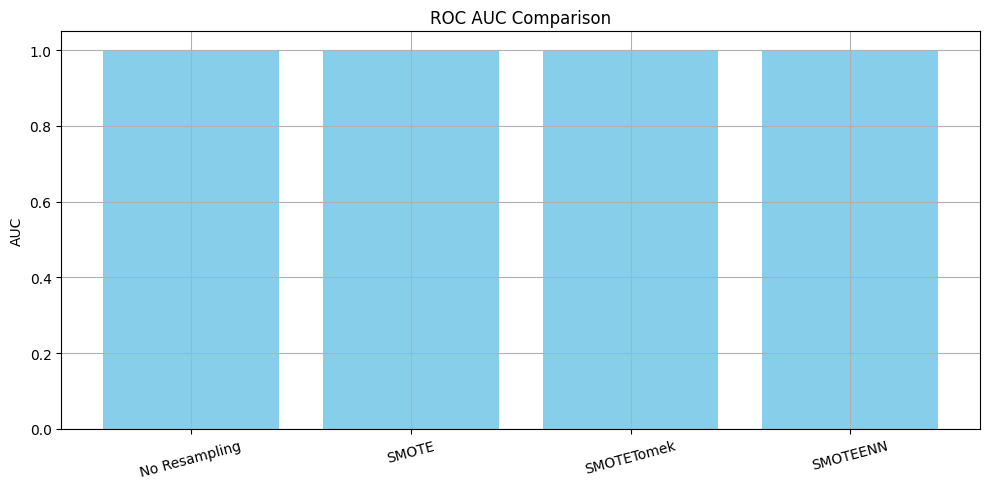

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("creditcard.csv")

# Sample 10% of data to reduce training time
df_sample = df.sample(frac=0.1, random_state=42)

# Separate features and target
X = df_sample.drop('Class', axis=1)
y = df_sample['Class']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Define resampling strategies
resamplers = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42)
}

results = {}

# Loop through each resampling strategy
for name, sampler in resamplers.items():
    print(f"\n\n==== {name} ====")

    # Resample
    if sampler:
        X_res, y_res = sampler.fit_resample(X_train, y_train)
    else:
        X_res, y_res = X_train, y_train

    # Train model
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        scale_pos_weight=(y_res == 0).sum() / (y_res == 1).sum(),  # handle imbalance
        random_state=42
    )
    model.fit(X_res, y_res)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)

    results[name] = {
        "report": report,
        "confusion_matrix": cm,
        "roc_auc": auc_roc,
        "pr_auc": auc_pr
    }

    print(f"ROC AUC Score: {auc_roc:.4f}")
    print(f"PR AUC Score : {auc_pr:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# OPTIONAL: Plot ROC AUC and PR AUC for each method
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), [v['roc_auc'] for v in results.values()], color='skyblue')
plt.title('ROC AUC Comparison'); plt.ylabel('AUC'); plt.xticks(rotation=15); plt.grid(True)
plt.tight_layout(); plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2279
   macro avg       0.90      1.00      0.94      2279
weighted avg       1.00      1.00      1.00      2279

Confusion Matrix:
 [[2274    1]
 [   0    4]]
ROC AUC Score: 0.9998901098901098


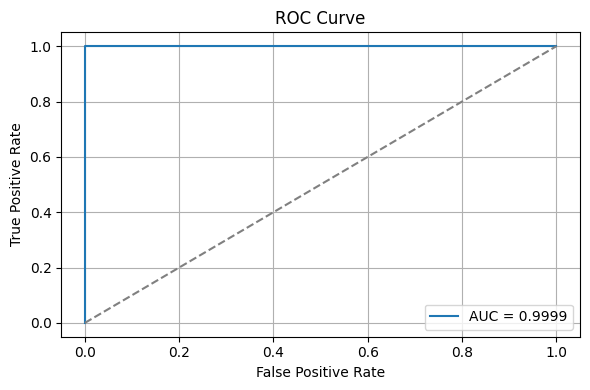

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load full dataset
df = pd.read_csv("creditcard.csv")

# STEP 1: Sample a smaller balanced subset (e.g., 10,000 total rows stratified)
df_small, _ = train_test_split(df, test_size=0.96, stratify=df['Class'], random_state=42)

# STEP 2: Split features and labels
X = df_small.drop('Class', axis=1)
y = df_small['Class']

# STEP 3: Train-test split (80-20 on smaller subset)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# STEP 4: Apply SMOTETomek
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X_train, y_train)

# STEP 5: Compute class weights
scale_pos_weight = (y_resampled == 0).sum() / (y_resampled == 1).sum()

# STEP 6: Train XGBoost model with class weights
model = XGBClassifier(
    scale_pos_weight=scale_pos_weight+1.1,
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_resampled, y_resampled)

# STEP 7: Predict and threshold tune
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = (y_proba > threshold).astype(int)

# STEP 8: Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# STEP 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters: {'colsample_bytree': 0.8628088249474745, 'learning_rate': 0.03818484499495253, 'max_depth': 9, 'n_estimators': 94, 'subsample': 0.7223651931039312}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       0.60      0.75      0.67         4

    accuracy                           1.00      2279
   macro avg       0.80      0.87      0.83      2279
weighted avg       1.00      1.00      1.00      2279

Confusion Matrix:
 [[2273    2]
 [   1    3]]
ROC AUC Score: 0.9997802197802198


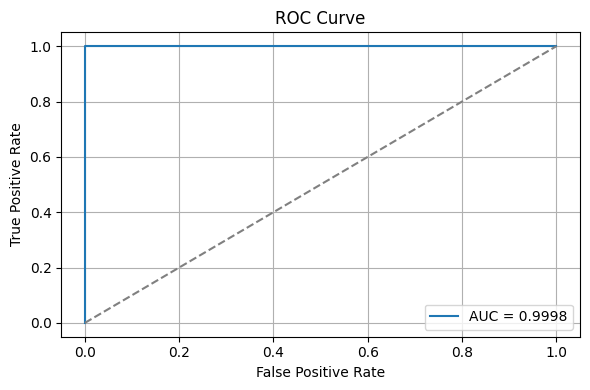

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Step 1: Load and sample smaller dataset (4% of original)
df = pd.read_csv("creditcard.csv")  # Replace with your path
df_small, _ = train_test_split(df, test_size=0.96, stratify=df['Class'], random_state=42)

X = df_small.drop('Class', axis=1)
y = df_small['Class']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTETomek
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X_train, y_train)

# Step 4: Class weight
scale_pos_weight = (y_resampled == 0).sum() / (y_resampled == 1).sum() + 1.1

# Step 5: Define model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

# Step 6: Hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Step 7: Hyperparameter tuning
rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rs.fit(X_resampled, y_resampled)

print("\nBest Parameters:", rs.best_params_)

# Step 8: Predict on test set using custom threshold
y_proba = rs.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = (y_proba > threshold).astype(int)

# Step 9: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 10: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters: {'colsample_bytree': 0.6225646316108401, 'learning_rate': 0.08219987722668247, 'max_depth': 10, 'n_estimators': 393, 'scale_pos_weight': 1.0077876584101433, 'subsample': 0.996884623716487}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2275
           1       0.80      1.00      0.89         4

    accuracy                           1.00      2279
   macro avg       0.90      1.00      0.94      2279
weighted avg       1.00      1.00      1.00      2279

Confusion Matrix:
 [[2274    1]
 [   0    4]]
ROC AUC Score: 0.9998901098901098


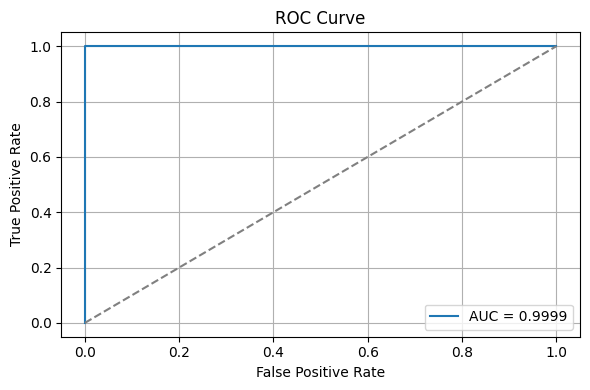

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Step 1: Load and sample smaller dataset (4% of original)
df = pd.read_csv("creditcard.csv")  # Replace with your actual path
df_small, _ = train_test_split(df, test_size=0.96, stratify=df['Class'], random_state=42)

X = df_small.drop('Class', axis=1)
y = df_small['Class']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTETomek for balanced dataset
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X_train, y_train)

# Step 4: Hyperparameter tuning space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 12),
    'learning_rate': uniform(0.01, 0.1),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'scale_pos_weight': uniform(1, 10)
}

# Step 5: Define model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Step 6: Hyperparameter tuning using recall as scoring
rs = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1',  # Focused on catching frauds
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_resampled, y_resampled)

print("\nBest Parameters:", rs.best_params_)

# Step 7: Predict on test set using lower threshold
y_proba = rs.predict_proba(X_test)[:, 1]
threshold = 0.25  # Aggressive threshold for catching frauds
y_pred = (y_proba > threshold).astype(int)

# Step 8: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 9: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


 Model saved to xgb_fraud_model.pkl

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56841    23]
 [   13    85]]
ROC AUC Score: 0.9867358064497606


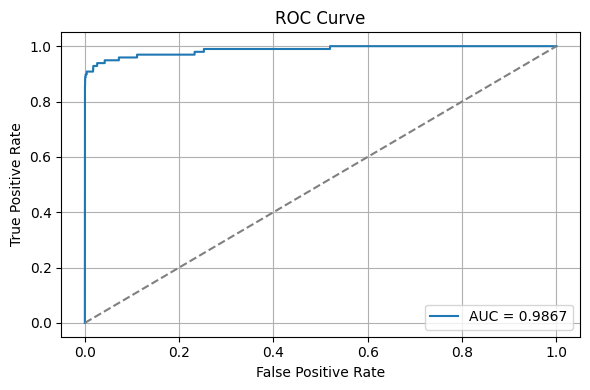

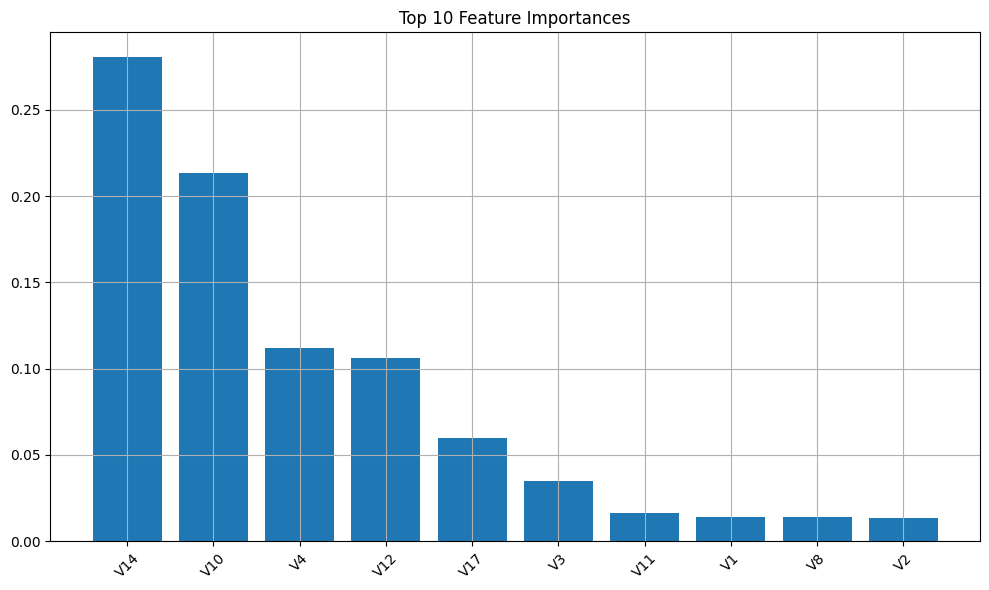

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib
import warnings

warnings.filterwarnings("ignore")

# Step 1: Load full dataset
df = pd.read_csv("creditcard.csv")  # Update with your full path

# Step 2: Split into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTETomek to training set only
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(X_train, y_train)

# Step 5: Use best scale_pos_weight from tuning
scale_pos_weight = (y_resampled == 0).sum() / (y_resampled == 1).sum() + 1.1

# Step 6: Define best model parameters (from RandomizedSearchCV using f1)
best_params = {
    'colsample_bytree': 0.6225646316108401,
    'learning_rate': 0.08219987722668247,
    'max_depth': 10,
    'n_estimators': 393,
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.996884623716487
}

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    **best_params
)

# Step 7: Train model
model.fit(X_resampled, y_resampled)

# Step 8: Save model
joblib.dump(model, 'xgb_fraud_model.pkl')
print(" Model saved to xgb_fraud_model.pkl")

# Step 9: Predict and evaluate on test set
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred = (y_proba > threshold).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 10: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.4f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 11: Plot Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.grid()
plt.show()
